## Principal component analysis
We will be performing a PCA on the classic MNIST dataset of handwritten digits.

Wikipedia page has good description of principal component analysis
https://en.wikipedia.org/wiki/Principal_component_analysis

### Explore the data

Import the dataset and use `pylab` to explore.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pylab as plt

%pylab inline
plt.gray();


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


    
See [load_digits documentation.](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
    
Using one figure with 100 subplots in 10-by-10 grid,  display the first 100 images using `pl.imshow`.

![100digits](imgs/first_100_digits.png)

    
To display only the images, use `pl.xticks([]), pl.yticks([])` and  `pl.axis('off')`.
    
#### PCA on subset

For simplicity we will look at the first 6 digits.

1- Load the first 6 digits of the MNIST digits dataset using [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

In [2]:
# 8 by 8 pixels
digits = load_digits(6)['data']
target = load_digits(6)['target']
np.shape(digits)

(1083, 64)

2- For PCA, it is important that our data is normalized/scaled.  Using scikit-learn's [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), scale the digits dataset.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
#scale our data mean = 0, var = 1
scale =StandardScaler()
digits_scaled = scale.fit_transform(digits)
digits_scaled[0]

array([ 0.        , -0.39943855, -0.16703526,  0.26139006, -0.6689282 ,
       -0.81158092, -0.39552047, -0.05863088, -0.05752068, -0.68352337,
        0.47458257,  0.73704578, -0.21030001,  1.25372906,  1.31892443,
       -0.09555924, -0.04968273,  0.00628231,  0.92711121, -0.9322487 ,
       -1.20943918,  0.70019697,  2.04081397, -0.11549758, -0.04301324,
        0.25871223,  0.46526955, -1.33051455, -1.476621  ,  0.24203138,
        1.53780828, -0.06088626,  0.        ,  0.52928999,  0.13392536,
       -1.20610481, -1.58765979,  0.12053359,  1.44281131,  0.        ,
       -0.07911684,  0.61179595,  0.73663191, -1.0236707 , -1.09724616,
        0.62648707,  1.05013021, -0.05270463, -0.04566156,  0.58488618,
        1.14118025, -0.86243746, -0.31319778,  0.45591635, -0.72018958,
       -0.21683909, -0.0304009 , -0.36212002, -0.03098521,  0.14767527,
       -0.60723195, -1.14434334, -0.48218707, -0.24520445])

In [5]:
#compare to previous
digits[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

3- Now that we have properly scaled images, we can apply the PCA transformation.  Using scikit-learn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), project our digits dataset into lower dimensional space.  First try 10 components.

In [6]:
from sklearn.decomposition import PCA

In [7]:
#fit the model
def pca_analysis(components,data):
    """transform our data given the number of components"""
    pca = PCA(n_components=components)
    fit_pca = pca.fit(data)
    return fit_pca

In [10]:
#project to a lower dimension
pca = PCA(n_components=10)
fit_transform_pca = pca.fit_transform(digits_scaled)
fit_transform_pca

array([[ 2.69542187,  4.13541094,  1.07006981, ..., -0.27975091,
        -0.46103394,  0.16134487],
       [ 0.03399326, -4.50620786, -1.36946927, ...,  1.3583175 ,
         0.28265173,  0.67852614],
       [ 0.75988425, -2.65699038, -2.21886552, ..., -0.78296967,
         1.78981702, -0.20160223],
       ..., 
       [ 6.14959187, -1.24726498, -1.31916021, ..., -1.52293243,
         0.27248792, -1.22012552],
       [ 6.21776902, -2.07661947,  0.05568877, ..., -1.01557558,
         0.07139452, -1.28185187],
       [ 3.13908043,  3.45701678,  1.33948271, ..., -0.6079485 ,
        -0.41303279,  1.0158597 ]])

4- Due to the loss of information in projecting data into lower dimensional space, our transformation is never perfect. One way we can determine how well it worked is to plot the amount of explained variance.  Using the function snippet below, plot the amount of explained variance of each of the principle components.

In [11]:
import numpy as np
def scree_plot(num_components, pca, title=None):
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    plt.ylabel('Variance Explained')
    plt.xlabel(' Principal Component')
    for i in range(num_components):
            ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]),
                        va="bottom", ha="center", fontsize=12)
    
    
    ax.set_xticklabels(ind, fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)
        
    

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


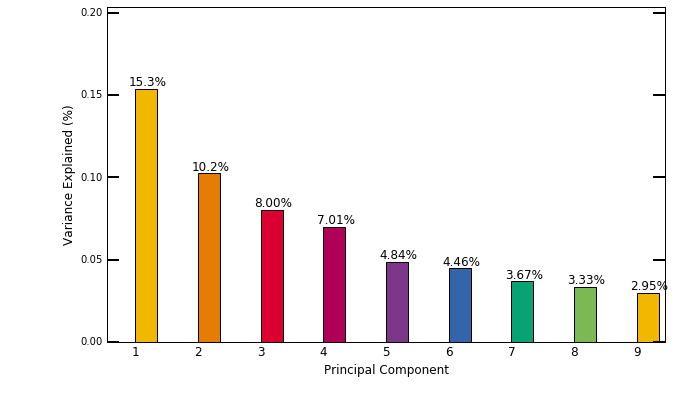

In [13]:
scree_plot(10,pca_analysis(10,digits_scaled))

5- We need to pick an appropriate number of components to keep.  Looking at the plot of explained variance, we are interested in finding the least number of principle components that explain the most variance. What is the optimal number of components to keep for the digits dataset?

6- Plot each of the eigen-vectors as images.  
    
Another way to visualize our digits is to force a projection into 2-dimensional space in order to visualize the data on a 2-dimensional plane. The code snippet below will plot our digits projected into 2-dimensions on x-y axis.

- 5
>We want to pick the number of components that accounts for the greatest number of variance. For our case, the first five components account for 45%. Although, we will not be able to determine the actual number until we look at the images of each eigenvectors.

In [14]:
15.2+10.2+8+7.01+4.84

45.25

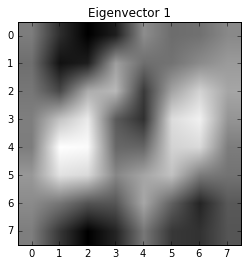

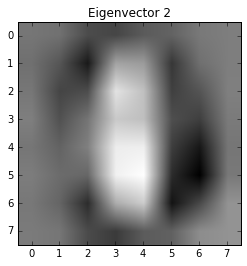

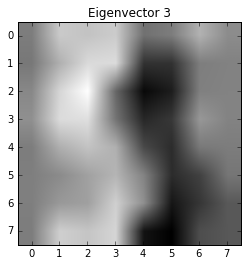

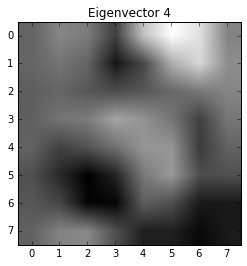

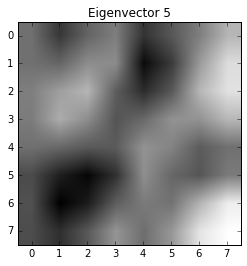

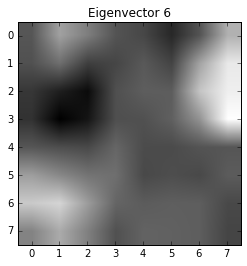

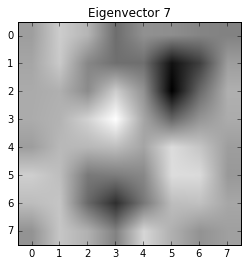

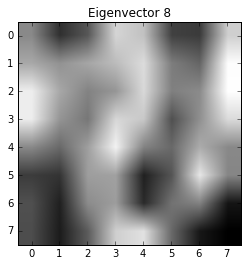

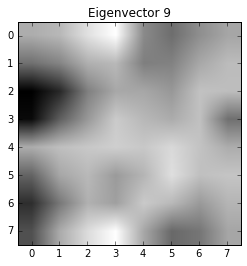

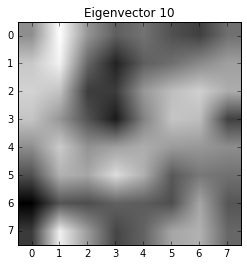

In [15]:
## get cov of feature to feature beloe
eigenvals = np.linalg.eig(np.cov(digits_scaled.T))[1]
#plot the eigenvectors 


for i in range(10):
    
    eigen = eigenvals[:,i]
    plt.figure()
    plt.imshow(eigen.reshape(8,8))
    plt.title('Eigenvector {}'.format(i+1))

In [16]:
# plot projection

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

7- Using the above method, project the digits dataset into 2-dimensions.  Do you notice anything about the resulting projections?  Does the plot remind you of anything?  Looking at the results, which digits end up near each other in 2-dimensional space?  Which digits have overlap in this new feature space?

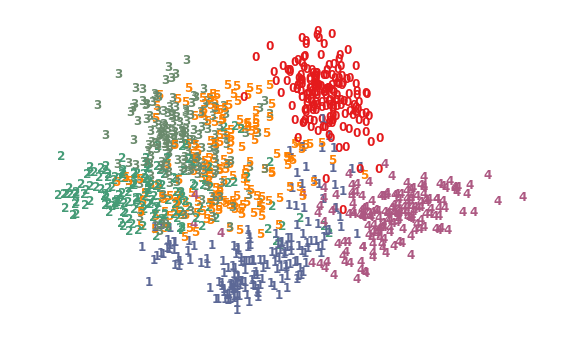

In [17]:
transformed_two = PCA(2).fit_transform(digits_scaled)
plot_embedding(transformed_two,target)

- Above we are looking at the matrix projected into the new basis with the actual labels of each digits outlined by a different color. The resulting projections show that when we rotate the matrix, the 0, 4, and 1 numbers have fairly distinct clumps in the resulting space (because they have different shapes to them). In addition, we see that the numbers 3 and 5 have a decent amount of overlap (because their shapes are more similar). Therefore, it is harder to distinguish between 3 and 5 in this space.

In [18]:
zero = load_digits(1)['data']
zero

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ..., 
       [ 0.,  0.,  9., ...,  4.,  0.,  0.],
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [19]:
eigenvals = np.linalg.eig(np.cov(zero.T))[0]
eigenvecs = np.linalg.eig(np.cov(zero.T))[1]

eigenvals

array([  8.64416636e+01,   7.05063047e+01,   3.79693526e+01,
         2.78838994e+01,   2.51465670e+01,   1.96509796e+01,
         1.39615456e+01,   1.34379418e+01,   1.16688390e+01,
         9.29289470e+00,   7.79983720e+00,   6.93419527e+00,
         6.06172783e+00,   5.70680963e+00,   5.05181040e+00,
         4.78038709e+00,   4.54302986e+00,   4.02903210e+00,
         3.74026381e+00,   3.42527949e+00,   3.46688871e+00,
         2.74285014e+00,   2.51790368e+00,   2.14027181e+00,
         1.90861869e+00,   5.29724419e-02,   3.42736193e-03,
         1.39417375e-02,   1.93512025e-02,   1.77107145e+00,
         1.69003999e+00,   1.64917374e+00,   1.71443284e-01,
         2.55448816e-01,   3.68696691e-01,   4.48872690e-01,
         5.06608358e-01,   5.74928480e-01,   6.65183749e-01,
         7.06586314e-01,   7.85554488e-01,   8.45534257e-01,
         9.59868592e-01,   1.07460847e+00,   1.42709042e+00,
         1.34283110e+00,   1.27216066e+00,   1.17540919e+00,
         0.00000000e+00,

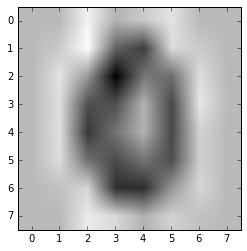

In [20]:
#ONe eigenvector and one eigenvalue
plt.imshow((eigenvecs[:,0]*eigenvals[0]).reshape(8,8))


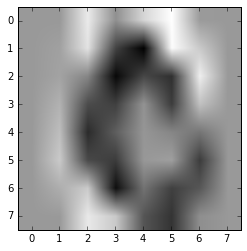

In [21]:
#Two eigenvectors and two eigenvalues
plt.imshow(((eigenvecs[:,0]*eigenvals[0])+(eigenvecs[:,1]*eigenvals[1])).reshape(8,8))

0
1
2
3
4
5
6
7
8
9


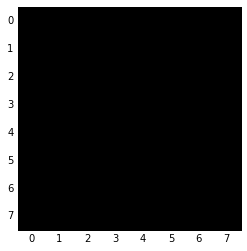

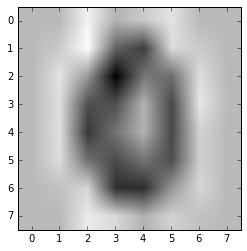

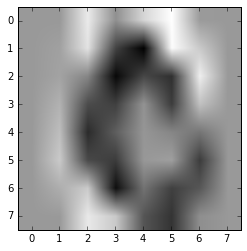

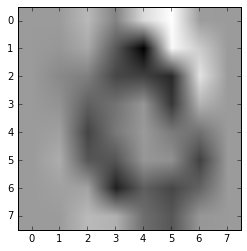

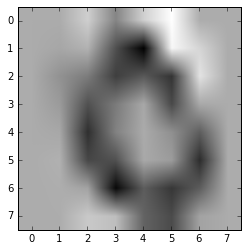

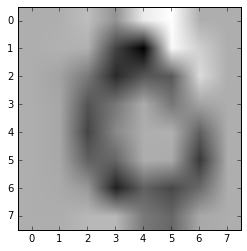

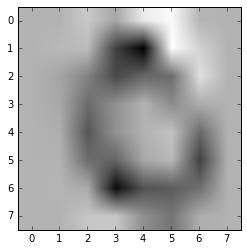

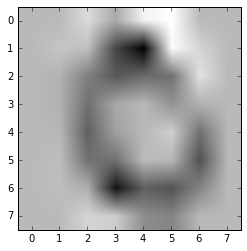

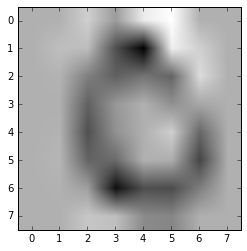

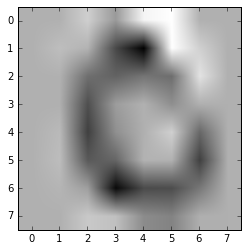

In [22]:
for i in range(10):
    print(i)
    plt.figure()
    plt.imshow((eigenvecs[:,:i].dot(eigenvals[:i])).reshape(8,8))